# Honey Production

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Check out the Data

I have loaded in DataFrame about honey production in the United States from Kaggle. It has following columns:
* state
* numcol
* yieldpercol
* totalprod
* stocks
* priceperlb
* prodvalue
* year

In [3]:
df = pd.read_csv('honeyproduction.csv')
# show head of dataframes
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


I care about the total production of honey per year.

In [6]:
# get the mean of total production per year
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year.head(5)

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


In [10]:
# get column year in prod_per_year dataframe and reshape it to the right format
X = prod_per_year['year']
X = X.values.reshape(-1, 1)
print(X)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


In [12]:
# get column totalprod in prod_per_year dataframe
y = prod_per_year['totalprod']
y.head(5)

0    5.105093e+06
1    4.706674e+06
2    5.106000e+06
3    4.221545e+06
4    3.892386e+06
Name: totalprod, dtype: float64

### Visualize the features and target

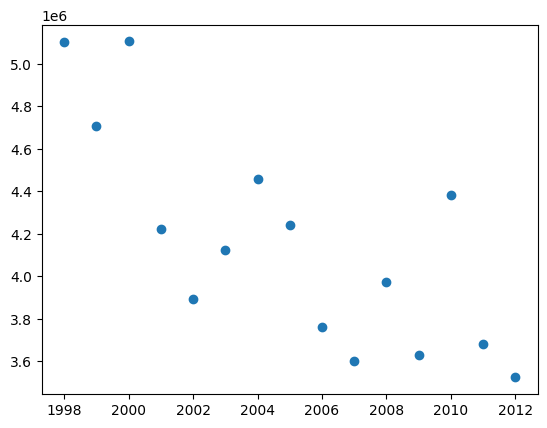

In [13]:
# scatter plot of X and y
plt.scatter(X, y)
plt.show()

### Create and Fit a Linear Regression Model

In [14]:
# Instantiate linear model using sklearn
regr = linear_model.LinearRegression()
# fit features in the model
regr.fit(X, y)

LinearRegression()

In [15]:
# show the slope of the line and intercept of the line
print(regr.coef_)
print(regr.intercept_)

[-88303.18915238]
181208083.10732976


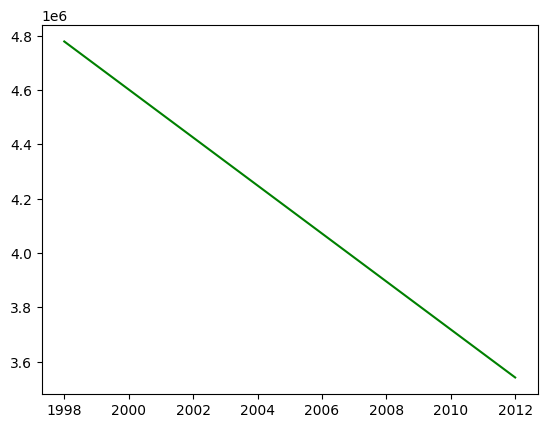

In [16]:
# get the predictions
y_predict = regr.predict(X)
# plot X and y_predict
plt.plot(X, y_predict, color='green')
plt.show()